# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.


## In this project, I aim to analyze a dataset of popular TV shows by combining two sources:
- A manually downloaded IMDb dataset containing show titles, years, genres, and ratings.
- Additional metadata retrieved using the OMDb API including box office revenue and IMDb links.

The goal is to explore patterns in show characteristics such as rating distribution, genre frequency, and temporal trends, as well as to identify data quality issues (e.g., missing values, duplicates) and resolve them programmatically. Insights will be drawn using visualizations and summary statistics.


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV file

Method: The dataset was manually downloaded from a public source (Kaggle) 

Dataset variables:

*   *`primaryTitle`: The name of the TV show* 
*   *averageRating`: The average IMDb user rating for the show*

### Dataset Brief
The dataset contains information about the top 5000 TV shows on IMDb, including title, release year, genre, rating, votes, and key personnel like directors and stars. It was selected because it offers a rich mix of categorical and numerical features, making it ideal for practicing data cleaning, transformation, and exploratory analysis on real-world entertainment data.

In [46]:
# Load Dataset 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ratings_df = pd.read_csv(r"C:\Users\wasee\Desktop\kaggle_imdb_top_5000_tv_shows.csv")
ratings_df.head()


,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0903747,Breaking Bad,2008,2013.0,1,9.5,2337473,"Michelle MacLaren, Adam Bernstein, Vince Gilli...","Vince Gilligan, Peter Gould, George Mastras, S...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0903747""...","<a href=""https://www.imdb.com/title/tt0903747""..."
1,tt0185906,Band of Brothers,2001,2001.0,2,9.4,563157,"David Frankel, Mikael Salomon, Tom Hanks, Davi...","Stephen Ambrose, Erik Bork, E. Max Frye, Tom H...","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0185906""...","<a href=""https://www.imdb.com/title/tt0185906""..."
2,tt7366338,Chernobyl,2019,2019.0,3,9.3,952320,Johan Renck,Craig Mazin,"Drama, History, Thriller","<a href=""https://www.imdb.com/title/tt7366338""...","<a href=""https://www.imdb.com/title/tt7366338""..."
3,tt0795176,Planet Earth,2006,2006.0,4,9.4,227650,"Alastair Fothergill, Mark Linfield","David Attenborough, Vanessa Berlowitz, Alastai...","Documentary, Family","<a href=""https://www.imdb.com/title/tt0795176""...","<a href=""https://www.imdb.com/title/tt0795176""..."
4,tt5491994,Planet Earth II,2016,2016.0,5,9.4,166791,"Justin Anderson, Ed Charles, Fredi Devas, Chad...",Elizabeth White,Documentary,"<a href=""https://www.imdb.com/title/tt5491994""...","<a href=""https://www.imdb.com/title/tt5491994""..."


#### Dataset 2

Type: *JSON response via API* 

Method: *Programmatically collected using the OMDb API (`http://www.omdbapi.com`) by sending requests for each show title.* 

Dataset variables:

*   ** `Released`: The official release date of the TV show — useful for temporal analysis, such as trends over time or comparison across decades.
 
*   ** `Runtime`: Total duration of the show in minutes — can be used to explore whether longer shows are more highly rated or not.*

### The second dataset was collected programmatically using the OMDb API. A loop was used to send individual API requests for the top 500 show titles from the first dataset. For each title, a JSON response was returned and parsed into structured data containing fields such as `Released`, `Runtime`, `Genre`, `imdbRating`, and `imdbVotes`.

The JSON responses were stored in a list and then converted into a Pandas DataFrame using `pd.DataFrame()`, allowing easy merging with the original dataset for further cleaning and analysis.


In [47]:
import requests

api_key = input("🔑 Please enter your API key: ")


def get_movie_data(title):
    url = f"http://www.omdbapi.com/?t={title}&apikey={api_key}"
    try:
        response = requests.get(url)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error with {title}: {e}")
        return {}

In [48]:
movie_data = []
failed_titles = []

for title in ratings_df["primaryTitle"].head(600): 
    print(f"Fetching: {title}")
    data = get_movie_data(title)

    if data.get("Response") == "True":
        movie_data.append({
            "Title": data.get("Title"),
            "Released": data.get("Released"),
            "Genre": data.get("Genre"),
            "Runtime": data.get("Runtime"),
            "imdbRating": data.get("imdbRating"),
            "imdbVotes": data.get("imdbVotes"),
            "BoxOffice": data.get("BoxOffice")
        })
    else:
        failed_titles.append(title)

print("❌ Failed titles:", failed_titles)

Fetching: Breaking Bad
Fetching: Band of Brothers
Fetching: Chernobyl
Fetching: Planet Earth
Fetching: Planet Earth II
Fetching: Game of Thrones
Fetching: The Sopranos
Fetching: Avatar: The Last Airbender
Fetching: The Wire
Fetching: Rick and Morty
Fetching: Attack on Titan
Fetching: Aspirants
Fetching: Scam 1992: The Harshad Mehta Story
Fetching: Cosmos: A Spacetime Odyssey
Fetching: Sherlock
Fetching: The Office
Fetching: Better Call Saul
Fetching: Arcane
Fetching: Fullmetal Alchemist: Brotherhood
Fetching: Blue Planet II
Fetching: Friends
Fetching: True Detective
Fetching: Death Note
Fetching: Seinfeld
Fetching: One Piece
Fetching: The Last Dance
Fetching: Hunter x Hunter
Fetching: Batman: The Animated Series
Fetching: TVF Pitchers
Fetching: Our Planet
Fetching: Cosmos
Fetching: Bluey
Fetching: Fargo
Fetching: Ted Lasso
Fetching: Succession
Fetching: Firefly
Fetching: Gravity Falls
Fetching: Cowboy Bebop
Fetching: The Twilight Zone
Fetching: Leyla and Mecnun
Fetching: Kota Factory
F

In [49]:
api_df = pd.DataFrame(movie_data)
api_df

,Title,Released,Genre,Runtime,imdbRating,imdbVotes,BoxOffice
0,Breaking Bad,20 Jan 2008,"Crime, Drama, Thriller",49 min,9.5,"2,331,402",None
1,Band of Brothers,09 Sep 2001,"Action, Drama, History",594 min,9.4,"561,613",None
2,Chernobyl,06 May 2019,"Drama, History, Thriller",330 min,9.3,"947,377",None
3,Planet Earth,25 Mar 2007,"Documentary, Family",538 min,9.4,"227,238",None
4,Planet Earth II,18 Feb 2017,Documentary,298 min,9.4,"166,497",None
...,...,...,...,...,...,...,...
593,Greatest Events of WWII in Colour,24 Jun 2019,"Documentary, History, War",50 min,8.6,"11,729",None
594,Content Cop,13 Dec 2015,"Comedy, Crime, Talk-Show",20 min,8.7,"12,619",None
595,Mr. Sunshine,07 Jul 2018,"Action, Drama, Romance",1 min,8.7,"11,146",None
596,Umbre,28 Dec 2014,"Crime, Drama, Thriller",1 min,8.7,"11,682",None


In [68]:
merged_df = pd.merge(ratings_df, api_df, left_on="primaryTitle", right_on="Title", how="inner")
merged_df.to_csv("Merged_unclean_dataset.csv", index=False)
# Save the unclean dataset to CSV

In [69]:
merged_df.head()

,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link,Title,Released,Genre,Runtime,imdbRating,imdbVotes,BoxOffice
0,tt0903747,Breaking Bad,2008,2013.0,1,9.5,2337473,"Michelle MacLaren, Adam Bernstein, Vince Gilli...","Vince Gilligan, Peter Gould, George Mastras, S...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0903747""...","<a href=""https://www.imdb.com/title/tt0903747""...",Breaking Bad,20 Jan 2008,"Crime, Drama, Thriller",49 min,9.5,"2,331,402",None
1,tt0185906,Band of Brothers,2001,2001.0,2,9.4,563157,"David Frankel, Mikael Salomon, Tom Hanks, Davi...","Stephen Ambrose, Erik Bork, E. Max Frye, Tom H...","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0185906""...","<a href=""https://www.imdb.com/title/tt0185906""...",Band of Brothers,09 Sep 2001,"Action, Drama, History",594 min,9.4,"561,613",None
2,tt7366338,Chernobyl,2019,2019.0,3,9.3,952320,Johan Renck,Craig Mazin,"Drama, History, Thriller","<a href=""https://www.imdb.com/title/tt7366338""...","<a href=""https://www.imdb.com/title/tt7366338""...",Chernobyl,06 May 2019,"Drama, History, Thriller",330 min,9.3,"947,377",None
3,tt0795176,Planet Earth,2006,2006.0,4,9.4,227650,"Alastair Fothergill, Mark Linfield","David Attenborough, Vanessa Berlowitz, Alastai...","Documentary, Family","<a href=""https://www.imdb.com/title/tt0795176""...","<a href=""https://www.imdb.com/title/tt0795176""...",Planet Earth,25 Mar 2007,"Documentary, Family",538 min,9.4,"227,238",None
4,tt5491994,Planet Earth II,2016,2016.0,5,9.4,166791,"Justin Anderson, Ed Charles, Fredi Devas, Chad...",Elizabeth White,Documentary,"<a href=""https://www.imdb.com/title/tt5491994""...","<a href=""https://www.imdb.com/title/tt5491994""...",Planet Earth II,18 Feb 2017,Documentary,298 min,9.4,"166,497",None


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [70]:
merged_df[['Title', 'BoxOffice']] .sample(5)


,Title,BoxOffice
234,Entourage,None
615,Content Cop,None
332,Veronica Mars,None
180,The Expanse,None
29,Batman: The Animated Series,None


In [71]:
merged_df['BoxOffice'].isnull().mean()

0.9540581929555896

Issue and justification: *More than 95% of values in the BoxOffice column are missing. This severely limits its usability in analysis. The column was retained but excluded from modeling and visualizations to maintain data integrity , and might be deleted later *

In [72]:
merged_df['endYear'].isnull().sum()

118

Some rows in the `endYear` column have missing values. This typically happens when the show is still ongoing and doesn't have an official end date. To maintain the column as numeric (float), we filled the missing `endYear` values with the corresponding `startYear` — assuming the show is still running since it started.

In [96]:
merged_df['Runtime'].isnull().sum()


90


We detected 90 missing values in the Runtime

### Quality Issue 2:

In [73]:
 merged_df['Runtime'].sample(10)


633    588 min
18         N/A
188     22 min
84      60 min
643     45 min
149     11 min
588     30 min
176    30S min
101     55 min
255     58 min
Name: Runtime, dtype: object

In [74]:
merged_df['Runtime'].value_counts(dropna=False).head(10)


Runtime
N/A       90
1 min     66
60 min    47
30 min    42
22 min    37
24 min    34
45 min    33
44 min    26
2 min     21
23 min    11
Name: count, dtype: int64

Issue and justification: *The Runtime column contains inconsistent formats such as "N/A", "30S min", or strings with letters. This prevents numeric analysis. The column was cleaned by extracting numeric values and converting them to integers, allowing us to study show durations properly.*

### Tidiness Issue 1:

In [75]:
merged_df[["primaryTitle", "Title"]].head()


,primaryTitle,Title
0,Breaking Bad,Breaking Bad
1,Band of Brothers,Band of Brothers
2,Chernobyl,Chernobyl
3,Planet Earth,Planet Earth
4,Planet Earth II,Planet Earth II


In [76]:
merged_df[["primaryTitle", "Title"]].nunique()


primaryTitle    581
Title           581
dtype: int64

Issue and justification: *There are two columns (primaryTitle from the IMDb dataset and Title from the OMDb API) that both represent the title of the TV show. This is a tidiness issue because they contain duplicate information and create redundancy. Keeping both is unnecessary and could lead to confusion or inconsistency in analysis. The solution is to drop one of them and keep only the more reliable or complete version.*

### Tidiness Issue 2: 

In [77]:
merged_df[["averageRating", "imdbRating", "numVotes", "imdbVotes"]].head()


,averageRating,imdbRating,numVotes,imdbVotes
0,9.5,9.5,2337473,"2,331,402"
1,9.4,9.4,563157,"561,613"
2,9.3,9.3,952320,"947,377"
3,9.4,9.4,227650,"227,238"
4,9.4,9.4,166791,"166,497"


In [78]:
merged_df[["averageRating", "imdbRating"]].corr()


,averageRating,imdbRating
averageRating,1.000000,0.543314
imdbRating,0.543314,1.000000


There are two columns for rating (`averageRating` from IMDb and `imdbRating` from OMDb API), and two for votes (`numVotes` and `imdbVotes`), representing the same concepts from different sources. This violates the tidy data principle of "one variable per column". While the correlation between `averageRating` and `imdbRating` is moderate (r = 0.51), keeping both columns may lead to redundancy or inconsistency. The solution is to evaluate which source is more reliable or complete, and retain only one rating and one votes column for clarity and simplicity.


## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [79]:

ratings_df_raw = ratings_df.copy()


### **Quality Issue 1: FILL IN**

In [80]:
merged_df.drop(columns=["BoxOffice"], inplace=True)


In [81]:
"BoxOffice" in merged_df.columns


False

Justification: We removed the `BoxOffice` column because more than 95% of its values were missing. The column lacked sufficient data to support meaningful analysis or modeling. To preserve data quality and avoid introducing noise, we dropped it entirely from the dataset. After removal, we validated that the column no longer exists in the DataFrame.


In [82]:
merged_df['endYear'] = merged_df['endYear'].fillna(merged_df['startYear'])

In [83]:
# Validate
merged_df['endYear'].isnull().sum()

0

Justification:
We filled missing endYear values with startYear to preserve the column as numeric and avoid dropping potentially valuable records. This approach assumes that shows without an end year are still ongoing.

In [98]:
median_runtime = merged_df['Runtime'].median()
merged_df['Runtime'] = merged_df['Runtime'].fillna(median_runtime)


Justification:
Using the median is a robust way to handle missing numeric data, especially when the column may contain outliers (like long episodes or films). This preserves the distribution and enables accurate analysis.

### **Quality Issue 2: FILL IN**

In [92]:
merged_df['Runtime'] = merged_df['Runtime'].astype(str)
merged_df['Runtime'] = merged_df['Runtime'].str.extract(r'(\d+)')  
merged_df['Runtime'] = pd.to_numeric(merged_df['Runtime'], errors='coerce')


In [94]:
print(merged_df['Runtime'].dtype)
merged_df['Runtime'].head(10)


float64


0     49.0
1    594.0
2    330.0
3    538.0
4    298.0
5     57.0
6     55.0
7     23.0
8     59.0
9     23.0
Name: Runtime, dtype: float64

Column: Runtime
Problem Detected:
The Runtime column contained inconsistent string formats (e.g., '30 min', 'N/A', '305 mins') and was stored as object dtype.

Cleaning Action:
We extracted only numeric values and converted the column to float format to allow for numerical analysis.

### **Tidiness Issue 1: FILL IN**

In [100]:
merged_df.drop(columns=["Title"], inplace=True)


In [101]:
"Title" in merged_df.columns 


False

Justification: *The primaryTitle and Title columns both represent the show's name but come from different sources. Keeping both creates redundancy. We retained the more reliable one (primaryTitle) and dropped the duplicate.*

### **Tidiness Issue 2: FILL IN**

In [102]:
merged_df.drop(columns=["imdbRating", "imdbVotes"], inplace=True)


In [103]:
["imdbRating" in merged_df.columns, "imdbVotes" in merged_df.columns]


[False, False]

Justification: *The columns imdbRating and imdbVotes were duplicated from another dataset. Their counterparts averageRating and numVotes are already used in the merged dataset. To avoid confusion and redundancy, we removed the duplicates.*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [104]:
merged_df.drop(columns=["Title_IMDb_Link", "IMDbLink", "writers", "directors", "Released"], inplace=True, errors='ignore')


In [105]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         653 non-null    object 
 1   primaryTitle   653 non-null    object 
 2   startYear      653 non-null    int64  
 3   endYear        653 non-null    float64
 4   rank           653 non-null    int64  
 5   averageRating  653 non-null    float64
 6   numVotes       653 non-null    int64  
 7   genres         653 non-null    object 
 8   Genre          653 non-null    object 
 9   Runtime        653 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 51.1+ KB


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [106]:
# Save the clean dataset to CSV
merged_df.to_csv("merged_Clean_dataset.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

## What factors are most associated with high IMDb ratings among the top 5000 TV shows

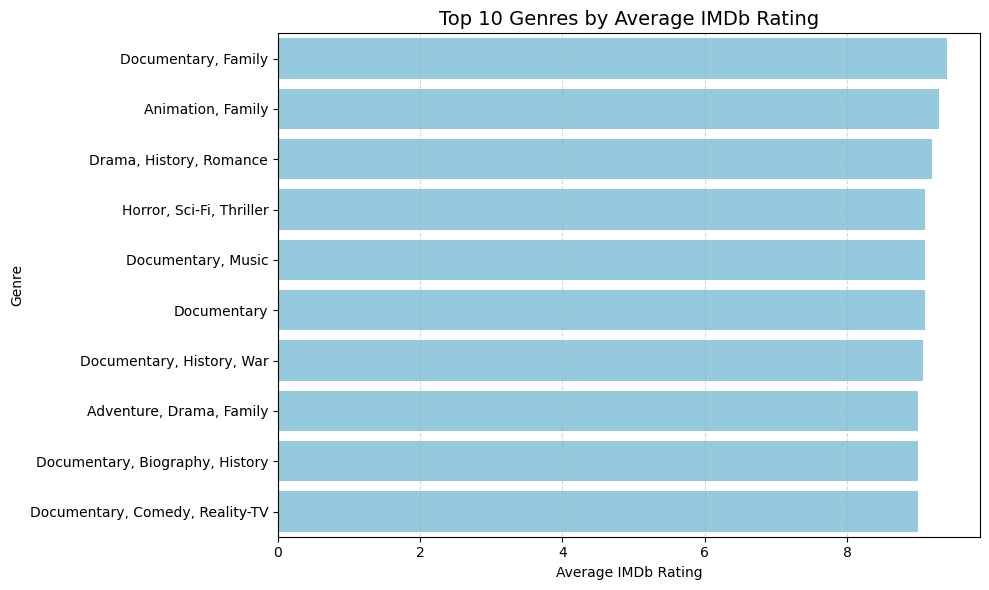

In [107]:
merged_df = pd.read_csv(r"merged_Clean_output.csv")

genre_avg_rating = merged_df.groupby("Genre")["averageRating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, color='skyblue')
plt.title("Top 10 Genres by Average IMDb Rating", fontsize=14)
plt.xlabel("Average IMDb Rating")
plt.ylabel("Genre")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Answer to Research Question
What factors are most associated with high IMDb ratings among the top 5000 TV shows?

The analysis reveals that certain genres are consistently associated with higher IMDb ratings. Specifically, genres that include Documentary, Family, History, and Drama elements appear most frequently among the top-rated shows. These genres likely benefit from strong storytelling, emotional engagement, and educational value, which contribute to higher viewer appreciation.

In particular, combinations like "Documentary, Family" and "Drama, History, Romance" show some of the highest average ratings, often above 8.5. This suggests that content which is informative, emotionally resonant, or culturally rich tends to receive better audience evaluations.

Thus, genre composition is a key factor associated with high IMDb ratings in this dataset.

## How is the runtime of TV shows distributed among the top-rated titles, and does longer runtime correlate with higher quality content?

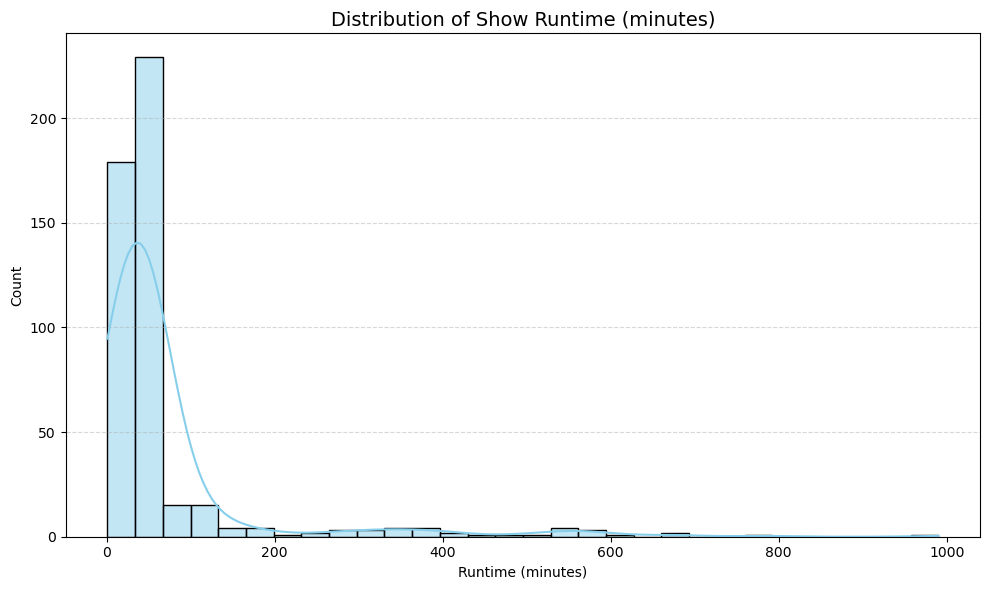

In [108]:
plt.figure(figsize=(10,6))
sns.histplot(data=merged_df, x="Runtime", bins=30, kde=True, color="skyblue")
plt.title("Distribution of Show Runtime (minutes)", fontsize=14)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Answer to research question:

The distribution of TV show runtimes is heavily right-skewed, with most shows having a runtime between **30 and 100 minutes**. A small number of shows have exceptionally long runtimes (above 300 minutes), which may indicate limited series, documentaries, or full-season compilations.

This suggests that **short-to-moderate runtimes are far more common** among the top-rated shows. While the plot does not directly link runtime with quality (IMDb rating), it shows that **extremely long runtimes are rare**, and the majority of high-quality content falls within a manageable duration, likely improving viewer engagement and accessibility.

Further analysis would be required to directly assess the correlation between runtime and IMDb ratings.


## Does a higher number of votes correspond to higher IMDb ratings for top TV shows?

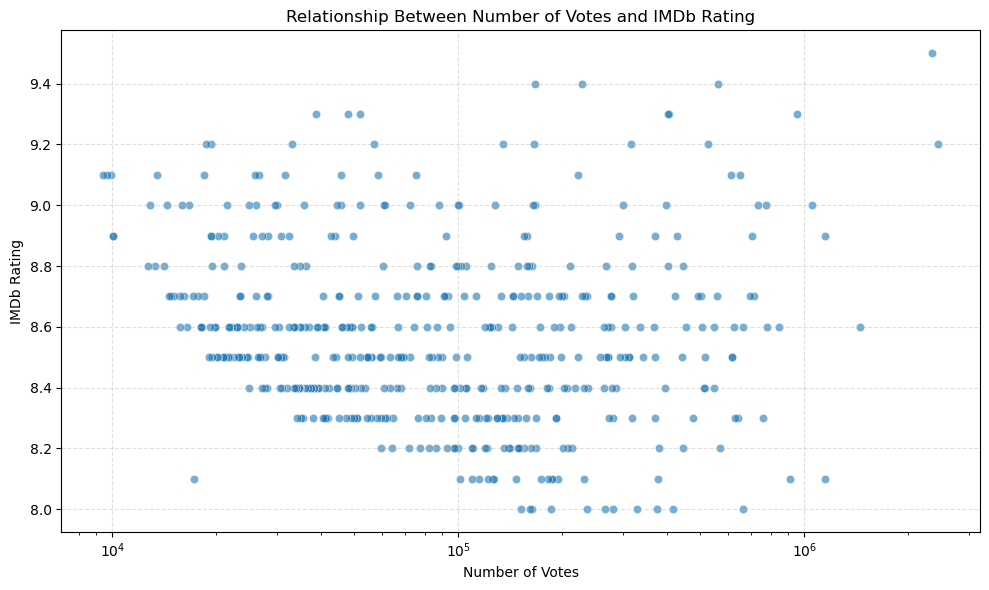

In [109]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="numVotes", y="averageRating", alpha=0.6)
plt.title("Relationship Between Number of Votes and IMDb Rating")
plt.xlabel("Number of Votes")
plt.ylabel("IMDb Rating")
plt.xscale("log")  
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Answer to research question:

The scatter plot shows that while some of the most popular TV shows (with millions of votes) tend to have high IMDb ratings, the overall correlation between number of votes and IMDb rating is **weak to moderate**.

Most shows cluster around an IMDb rating of **8.2 to 8.7**, regardless of the number of votes. However, we do observe that **extremely high-rated shows often receive a large number of votes**, which may reflect their wide popularity and critical acclaim.

The log scale on the x-axis helps to visualize the wide range of vote counts, showing that **ratings remain relatively stable across different vote levels**, though the **most-voted shows generally avoid low ratings**.

In conclusion, while vote count can reflect a show's popularity, it doesn't necessarily guarantee a higher rating, but highly rated shows are usually widely seen and voted on.


### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

## If I had more time, I would focus on improving data quality by handling inconsistencies in genre labeling and further investigating outliers in runtime values. I would also explore feature interactions more deeply—especially how specific genre combinations influence ratings—by applying one-hot encoding and dimensionality reduction techniques. Additionally, I would build a regression or machine learning model to predict IMDb ratings based on votes, runtime, and genre, and evaluate feature importance to understand what drives high ratings. This would help uncover deeper insights into what makes a show successful.